In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

11490434/11490434 [==============================] - 1s 0us/step


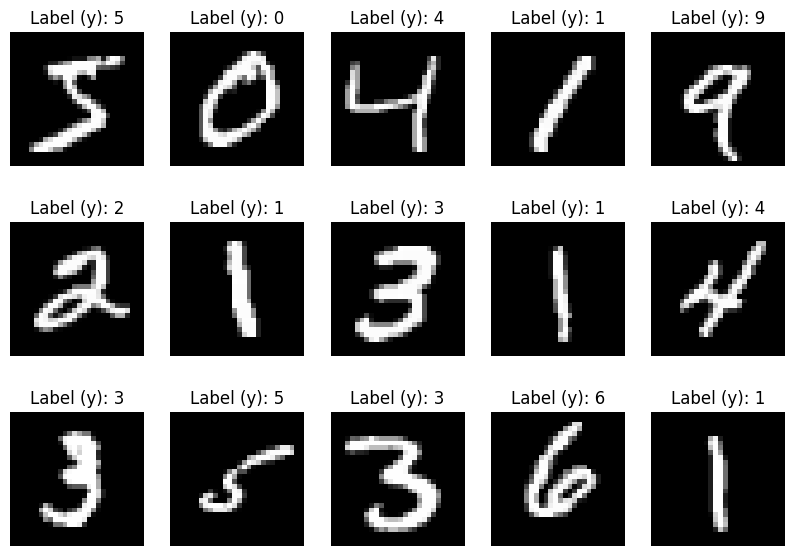

In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

fig = plt.figure(figsize=(10,7))

for i in range(15):
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=train_y[i]))
    plt.axis('off')



In [ ]:
def flatten(train_X, test_X):
    train_X = train_X.reshape(60000,28*28)
    test_X = test_X.reshape(10000,28*28)\
    
    return train_X, test_X

  # each image here is a 28x28 matrix. To use softmax regression you need to reshape the matrix to a vector of length 28x28 = 784
  

In [ ]:
def one_hot(y):
    y = np.array(y)
    one_hot = np.zeros((y.size, y.max() + 1))
    one_hot[np.arange(y.size),y] = 1

    return one_hot
  # y is the label column. You need to convert each label into a one-hot vector of dimension 1 x 10
  

In [ ]:
train_X, test_X = flatten(train_X, test_X)
mat = one_hot(train_y)
mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
# def softmax(z):
#     t = np.exp(z)
#     t = t / t.sum(axis=0, keepdims=True)
#     return t
def softmax(z):
  eps = np.finfo(float).eps
  if np.any(z <= eps):
      z[z <= eps] = eps
  exp_z = np.exp(z)
  ret = exp_z/ np.sum(exp_z, axis = 0, keepdims= True)
  return ret
    #z is your predicted score for all k classes for all of the data instances. So, z has dimension m x k. Convert it to a softmax distribution.

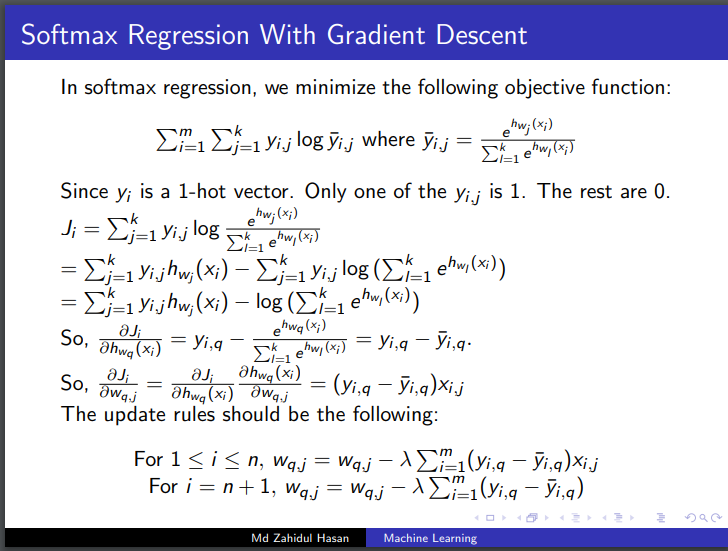

In [ ]:
def train(X, y, lamb, iterations):
  m = X.shape[0]
  n = X.shape[1]
  W = np.random.uniform(0,1,(10,n))
  b = np.random.random(10)
  mat = one_hot(y)
  pred = np.zeros((60000,10))

  for iteration in range(iterations):
    for q in range(10):
      b_q = 0
      for j in range(n):
        w_qj = 0
        for i in range(m):
          z = np.dot(W, X[i]) + b
          pred[i] = softmax(z) 
          w_qj += (mat[i][q]-pred[i][q])* X[i][j]
          b_q += (mat[i][q]- pred[i][q])
        W[q][j] -= 1/m *lamb* w_qj
      b[q] -= 1/m *lamb*b_q
  return W, b

#   for iteration in range(iterations):
#     for q in range(10):
#       b_q = 0
#       w_q = 0
#       for i in range(m):
#         z = np.dot(W, X[i]) + b
#         pred[i] = softmax(z) 
#         w_q += (mat[i][q]-pred[i][q])* X[i]
#         b_q += (mat[i][q]- pred[i][q])
#       W[q] -= 1/m *lamb* w_q
#       b[q] -= 1/m *lamb*b_q
#   return W, b 

In [ ]:
# def train(X, y, lamb, iterations):
#   m = X.shape[0]
#   n = X.shape[1]
#   W = np.random.uniform(0,1,(10,n))
#   b = np.random.random(10)
#   mat = one_hot(y)
#   pred = np.zeros((60000,10))
# #   for iteration in range(iterations):
# #     for q in range(10):
        
# #         for j in range(n):
               
# #             for i in range(m):
# #                 W[j][q] -= lamb*(y[i][q]-pred[i][q])
# #   return W, b


 

In [ ]:
X_train = train_X.reshape(60000,28*28)
X_train = X_train/255
X_train[0].shape


(784,)

In [ ]:
W, b = train(X_train, train_y, 0.01, 10)

In [ ]:
pred_y = []
def predict(X, w, b):
  test_m = X.shape[0]
  for i in range(test_m):
    z = np.dot(w, X[i]) + b
    pred = softmax(z)
    idx = np.argmax(pred)
    pred_y.append(idx)
    # print(pred)
    # print("compare", test_y[i], idx)
    
  return pred_y

In [ ]:
pred_y = predict(test_X, W, b)


In [ ]:
from sklearn.metrics import accuracy_score
def accuracy(y, z):
    print(accuracy_score(y, y_pred=z))

    #compute the accuracy of your prediction

In [ ]:
pred_y = np.array(pred_y)
# pred_y.shape

In [ ]:
#here print the training and testing accuracy
accuracy(test_y, pred_y)